## Install packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF
from numpy import asarray
from numpy import savetxt
import matplotlib.colors as mcolors
import matplotlib.cm
import matplotlib.patches as mpatches
import umap
import matplotlib as mpl
import scanpy as sc
import scipy
import kmapper as km
from kmapper import jupyter
from kmapper.plotlyviz import plotlyviz
from kmapper.plotlyviz import *
import plotly.graph_objs as go
import sys
from sklearn import ensemble
import tqdm
from ripser import Rips

## Read in data

In [4]:
data_anndata = sc.read("Wilson_COVID_Sconvalescent.h5ad")
genes = pd.read_csv("gene_Wilson_COVID.csv", header = 0, index_col = 0)

In [5]:
data_anndata

AnnData object with n_obs × n_vars = 55655 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'subject', 'percent.mt', 'dataset', 'integrated_snn_res.0.6', 'seurat_clusters', 'ident'
    obsm: 'PCA', 'UMAP'

In [6]:
labels = data_anndata.obs['orig.ident'].index
genes = np.reshape(np.array(genes), (2000,))
print(genes)

['CH17-224D4.2' 'JCHAIN' 'ACTG1' ... 'PARP3' 'SLF2' 'ODF3B']


In [7]:
data = data_anndata.X
print("Data shape: "+repr(data.shape))

Data shape: (55655, 2000)


In [8]:
UMAP = data_anndata.obsm["UMAP"]
clusters = data_anndata.obs['seurat_clusters']

print("UMAP shape: "+repr(UMAP.shape))
print("Clusters shape: "+repr(clusters.shape))

UMAP shape: (55655, 2)
Clusters shape: (55655,)


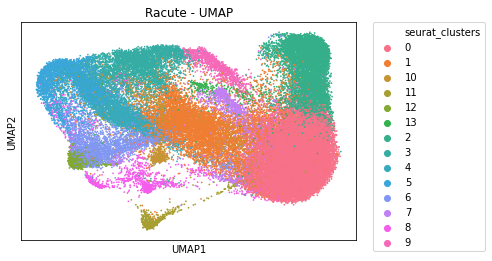

In [9]:
frame1 = sns.scatterplot(UMAP[:,0], UMAP[:,1], s=3, hue = clusters, linewidth = 0)
plt.title('Racute - UMAP')
#plt.xlim(-30000,25000)
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [10]:
data = scipy.sparse.csr_matrix.toarray(data)
pd_data = pd.DataFrame(data, index = labels, columns = genes)

In [11]:
pd_data

,CH17-224D4.2,JCHAIN,ACTG1,CH17-224D4.1,GAPDH,LGALS1,NKG7,S100A4,MZB1,AC233755.2,...,ZEB1,ARL6IP5,MIS18A,WASF1,CCT3,NIN,ADAMTS6,PARP3,SLF2,ODF3B
R125_AAACGGGTCTCAACTT-1,0.060946,0.159751,2.280395,0.061153,1.141000,0.327522,-0.649868,-0.669206,0.388244,0.043637,...,0.041302,1.055767,-0.062377,0.075124,-0.413782,-0.012288,-0.187381,0.022586,-0.040362,-0.120388
R125_AAAGATGTCTCTTGAT-1,-0.301821,5.770796,2.062858,-0.018103,1.151240,3.072129,-0.044792,0.403898,2.120549,-0.190105,...,0.058767,1.246989,0.020476,0.000371,1.123573,0.165292,-0.030540,0.092768,0.073404,-0.113394
R125_AAAGCAACAATCCGAT-1,0.080330,-0.484415,0.395315,0.001661,-0.276652,-0.464804,-0.082333,-0.007665,0.015130,-0.012926,...,0.015773,-0.085510,0.085805,0.031044,0.060537,0.107228,-0.009633,0.028735,-0.056492,0.078119
R125_AAAGCAACAGCGTTCG-1,0.032926,0.551645,2.186720,0.016961,2.425778,0.816706,1.042528,1.698620,0.062379,-0.055142,...,0.026225,1.557242,-0.014570,-0.012665,-0.224846,0.047733,-0.128920,-0.081126,-0.018057,0.142749
R125_AAAGCAAGTACCATCA-1,0.129982,0.654330,3.497057,0.011375,2.474537,2.031199,-0.237407,0.863590,0.328066,0.039835,...,0.054406,0.818787,0.022884,-0.027734,-0.122769,0.009993,-0.091223,0.013000,-0.018118,0.046281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S92_TTTGTCAAGGTGATAT-1,0.048542,0.815137,2.442004,0.031873,1.684820,0.709178,0.028588,1.366250,0.102295,0.023456,...,0.979375,0.616026,-0.014076,0.063305,1.187187,0.908656,-0.043995,-0.005349,-0.345876,0.049660
S92_TTTGTCAAGTCCGTAT-1,0.095082,0.268615,0.293493,0.013538,-0.578554,0.168593,-0.006548,0.364733,0.621762,-0.027727,...,0.032401,1.617696,1.686218,0.074267,0.097565,0.044981,-0.011983,1.673009,0.093350,0.045673
S92_TTTGTCACAGTGACAG-1,0.088018,0.329582,0.951764,0.008407,1.789949,0.619439,0.025528,0.477866,0.370854,0.089441,...,0.000385,0.047664,0.035048,0.025693,0.331674,1.714714,-0.060213,0.071617,-0.010523,0.031411
S92_TTTGTCACATGCGCAC-1,-0.558791,0.091559,2.133589,0.009059,-0.397069,0.155320,0.001972,2.223734,0.466141,-0.038889,...,-0.099596,-0.121040,0.103167,0.102429,0.385896,0.107234,0.026908,-0.189927,-0.045162,-0.031451


## Distance Matrix

In [12]:
from manifold_utils.mSVD import eigen_plot, eigen_calc_from_dist_mat, eps_projection

In [ ]:
N, d = pd_data.shape
np_data = np.array(pd_data) 

dist_mat = np.zeros((N, N))
for j in range(N):
    for k in range(0,N):
        if j != k:
            dist_mat[j, k] = np.linalg.norm(np_data[j, :] - np_data[k, :])

In [ ]:
savetxt('dist_mat_Sconvalescent.csv', dist_mat, delimiter=',')

dist_mat = pd.read_csv('dist_mat_Sconvalescent.csv', sep=",", header = None)
dist_mat = np.array(dist_mat )

In [ ]:
print(dist_mat.shape)

## Witness complex

In [144]:
from time import time
import numpy as np
from tda_utils.density_filtration import sort_distances_per_point, indices_for_density_filtration
from tda_utils.witness_complex import *

dist_per_pt = sort_distances_per_point(dist_mat)

# Load in ILC data
sct_sparse = np_data
dist_mat = dist_mat
n, d = sct_sparse.shape
print("n = "+str(n))
print("d = "+str(d))
print("shape of dist_mat: "+str(dist_mat.shape))

# Load in distances per point
distances_per_point = dist_per_pt

# time computation of density filtrations
print("Timing computation of density filtrations...")
density_indices = dict()
density_filtrations = dict()
ks = [10, 100, 1000]
#      10000]
ps = [0.01, 0.05, 0.1, 0.2]
for k in ks:
    for p in ps:
        print("\tk = "+str(k)+", p = "+str(p)+":")
        start = time()
        indices = indices_for_density_filtration(distances_per_point, k, p)
        density_indices[(k, p)] = indices
        mask = np.zeros(n, dtype=bool)
        mask[indices] = True
        sqr_mask = np.outer(mask, mask)
        density_filtrations[(k, p)] = np.reshape(dist_mat[sqr_mask], (len(indices), len(indices)))
        print("\t"+str(time()-start)+" seconds\n")

print("Timing computation of landmarks...")
landmark_indices = dict()
landmark_mats = dict()
pps = [0.05, 0.1, 0.2]
for k in ks:
    for p in ps:
        for pp in pps:
            print("\tk = "+str(k)+", p = "+str(p)+", pp = "+str(pp)+":")
            start = time()
            landmark_indices[(k, p, pp)], landmark_mats[(k, p, pp)] = choose_landmarks(density_filtrations[(k, p)], pp)
            print("\t"+str(time()-start)+" seconds\n")

print("Printing numbers of landmarks...")
for k in ks:
    for p in ps:
        for pp in pps:
            toople = (k, p, pp)
            print(str(toople)+": "+str(len(landmark_indices[toople])))
            if toople == (1000, 0.2, 0.2):
                print("saving")
                landmark_inds = landmark_indices[toople]
                dense_inds = density_indices[(k, p)]
                true_inds = [dense_inds[ind] for ind in landmark_inds]
                print(true_inds)
                to_save = np.vstack([sct_sparse[ind, :] for ind in true_inds])
                np.save("Wilson_COVID_Racute_landmarks.npy", to_save)
                np.save("Wilson_COVID_Racute_landmark_indices.npy", true_inds)

n = 4951
d = 2000
shape of dist_mat: (4951, 4951)
Timing computation of density filtrations...
	k = 10, p = 0.01:
	0.018612146377563477 seconds

	k = 10, p = 0.05:
	0.018940210342407227 seconds

	k = 10, p = 0.1:
	0.021460771560668945 seconds

	k = 10, p = 0.2:
	0.03069448471069336 seconds

	k = 100, p = 0.01:
	0.01827859878540039 seconds

	k = 100, p = 0.05:
	0.019772768020629883 seconds

	k = 100, p = 0.1:
	0.021836042404174805 seconds

	k = 100, p = 0.2:
	0.030000686645507812 seconds

	k = 1000, p = 0.01:
	0.018535375595092773 seconds

	k = 1000, p = 0.05:
	0.01963210105895996 seconds

	k = 1000, p = 0.1:
	0.022893190383911133 seconds

	k = 1000, p = 0.2:
	0.03233647346496582 seconds

Timing computation of landmarks...
	k = 10, p = 0.01, pp = 0.05:
	0.0 seconds

	k = 10, p = 0.01, pp = 0.1:
	0.0 seconds

	k = 10, p = 0.01, pp = 0.2:
	0.0 seconds

	k = 10, p = 0.05, pp = 0.05:
	0.0 seconds

	k = 10, p = 0.05, pp = 0.1:
	0.0010004043579101562 seconds

	k = 10, p = 0.05, pp = 0.2:
	0.0

## Visualize Landmarks

In [145]:
landmarks = np.load("Wilson_COVID_Racute_landmarks.npy")

landmarks = true_inds
print(true_inds)

[2382, 956, 2517, 161, 1137, 2524, 4241, 832, 3705, 4340, 3791, 4681, 4146, 481, 3253, 2568, 178, 4, 740, 606, 3761, 2800, 4805, 2541, 3368, 719, 2967, 4328, 1639, 3775, 497, 3567, 3223, 1562, 2604, 4842, 2627, 3604, 494, 199, 3588, 751, 3935, 1052, 2275, 911, 3566, 1721, 102, 1446, 2725, 4694, 4221, 3035, 627, 1540, 1123, 2176, 345, 3639, 2601, 3748, 4161, 1971, 3539, 2631, 4742, 1943, 937, 376, 2319, 259, 3985, 2486, 1418, 3478, 3063, 1797, 2478, 3745, 3498, 4491, 2694, 2472, 247, 4504, 160, 502, 4941, 1985, 1408, 4015, 422, 3912, 4001, 3495, 1235, 547, 2134, 1617, 4633, 2623, 4735, 3857, 4267, 3574, 4415, 2817, 2878, 1003, 332, 4064, 3213, 3884, 143, 1486, 453, 4763, 2352, 4429, 206, 286, 1398, 3415, 3711, 64, 577, 60, 2326, 571, 3199, 3140, 729, 2509, 1170, 4651, 713, 162, 1082, 3788, 197, 936, 914, 2009, 901, 508, 1119, 3222, 4127, 1081, 3646, 1312, 3750, 3484, 1836, 3059, 790, 2258, 2728, 3760, 749, 632, 1012, 131, 4386, 2133, 373, 3942, 2935, 4488, 537, 3144, 141, 3644, 778, 327

In [146]:
N, d = np_data.shape

UMAP = np.array(UMAP)
print(UMAP.shape)

UMAP_landmark = np.zeros((1,2))
data_landmark = np.zeros((1,genes.shape[0]))

#Going through all of the cells, if index in landmarks we should pull the associated gene expression data
for i in landmarks:
    next_cell = np_data[i,:]
    next_cell = np.reshape(next_cell, (1, genes.shape[0]))
    data_landmark = np.append(data_landmark, next_cell, axis = 0)
        
    next_embedding = UMAP[i,:]
    next_embedding = np.reshape(next_embedding, (1,2))
    UMAP_landmark = np.append(UMAP_landmark, next_embedding, axis = 0)

#To get the indices to work out I have a row of zeros at the top that I need to omit
data_landmark = data_landmark[1:, :]    
UMAP_landmark = UMAP_landmark[1:, :]

print(data_landmark.shape)
print(UMAP_landmark.shape)

(4951, 2)
(198, 2000)
(198, 2)


In [ ]:
frame1 = plt.scatter(UMAP[:,0], UMAP[:,1], s=1, c = "silver")
frame1 = plt.scatter(UMAP_landmark[:,0], UMAP_landmark[:,1], s=1, c = "red")
plt.title('Racute - UMAP')
#plt.xlim(-30000,25000)
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.show()

## Persistence Diagrams

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


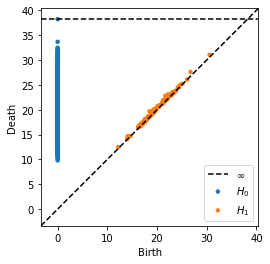

In [152]:
rips = Rips()
diagrams = rips.fit_transform(np_data, distance_matrix=False, metric="euclidean")
rips.plot(diagrams)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


c:\users\hmkri\desktop\riesenfeld pearson\lib\site-packages\ripser\ripser.py:257: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


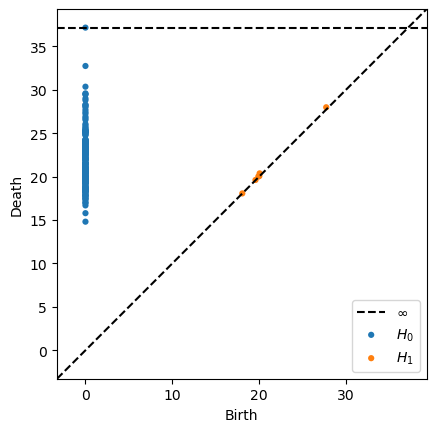

In [153]:
rips = Rips()
diagrams = rips.fit_transform(data_landmark, distance_matrix=False, metric="euclidean")
rips.plot(diagrams)

## Eigen plots

In [154]:
from manifold_utils.mSVD import eigen_plot, eigen_calc_from_dist_mat, eps_projection, eigen_plot_numPoints, eigen_calc_from_dist_mat_withNumPoints
from manifold_utils.iga import chakraborty_express, iga

In [ ]:
for i in range(len(landmarks)):
    center = landmarks[i]
    radii, eigval_list, eigvec_list = eigen_calc_from_dist_mat(np_data, dist_mat, center, radint = .01)

    rmin = radii[0]
    rmax = radii[-1]
    
    eigen_plot(eigval_list, radii, rmin, rmax)